# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai kaggle : https://www.kaggle.com/datasets/miadul/credit-card-fraud-detection-dataset

2. **Tentang Dataset**:
   Dataset ini adalah dataset tentang credit card fraud detection


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import libraries untuk data manipulation
import pandas as pd
import numpy as np

# Import libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

# Import libraries untuk modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import libraries untuk evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import libraries untuk handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load dataset
df = pd.read_csv('Credit Card Dataset/credit_card_fraud_10k.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 rows:")
print(df.head())
print("\n" + "="*80)
print("Dataset Info:")
print(df.info())
print("\n" + "="*80)
print("Statistical Summary:")
print(df.describe())

Dataset Shape: (10000, 10)

First 5 rows:
   transaction_id  amount  transaction_hour merchant_category  \
0               1   84.47                22       Electronics   
1               2  541.82                 3            Travel   
2               3  237.01                17           Grocery   
3               4  164.33                 4           Grocery   
4               5   30.53                15              Food   

   foreign_transaction  location_mismatch  device_trust_score  \
0                    0                  0                  66   
1                    1                  0                  87   
2                    0                  0                  49   
3                    0                  1                  72   
4                    0                  0                  79   

   velocity_last_24h  cardholder_age  is_fraud  
0                  3              40         0  
1                  1              64         0  
2                  1         

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Missing Values:
transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

Number of duplicates: 0

Target Distribution:
is_fraud
0    9849
1     151
Name: count, dtype: int64

Target Distribution (%):
is_fraud
0    98.49
1     1.51
Name: proportion, dtype: float64



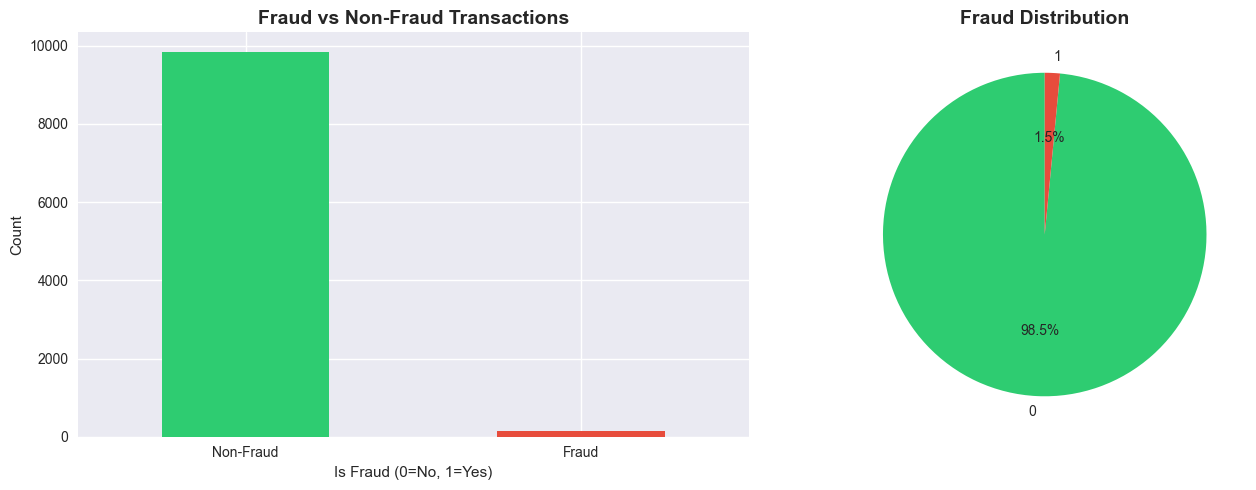


Merchant Category Distribution:
merchant_category
Food           2093
Clothing       2050
Travel         1990
Grocery        1944
Electronics    1923
Name: count, dtype: int64


Numerical Features Statistics by Fraud Status:
              amount  transaction_hour  device_trust_score  velocity_last_24h  \
is_fraud                                                                        
0         175.333015         11.712154           62.165804           1.990557   
1         216.182980          3.841060           37.867550           3.205298   

          cardholder_age  
is_fraud                  
0              43.469794  
1              43.397351  



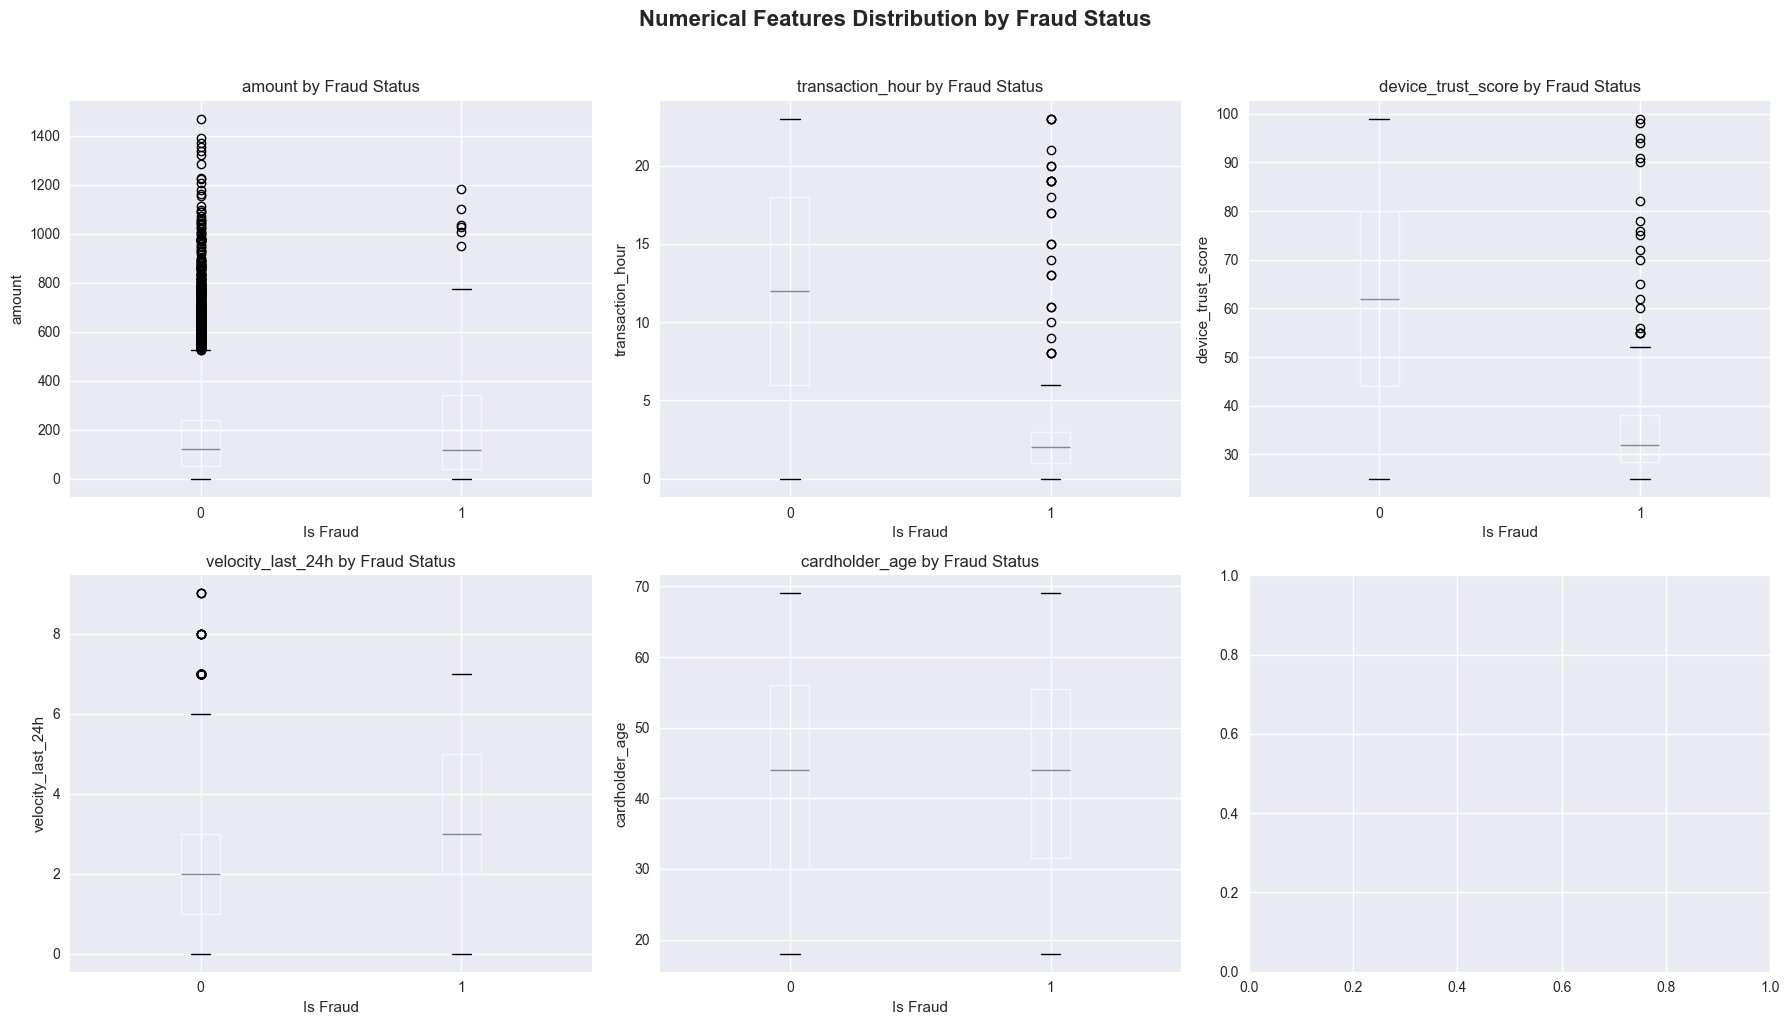

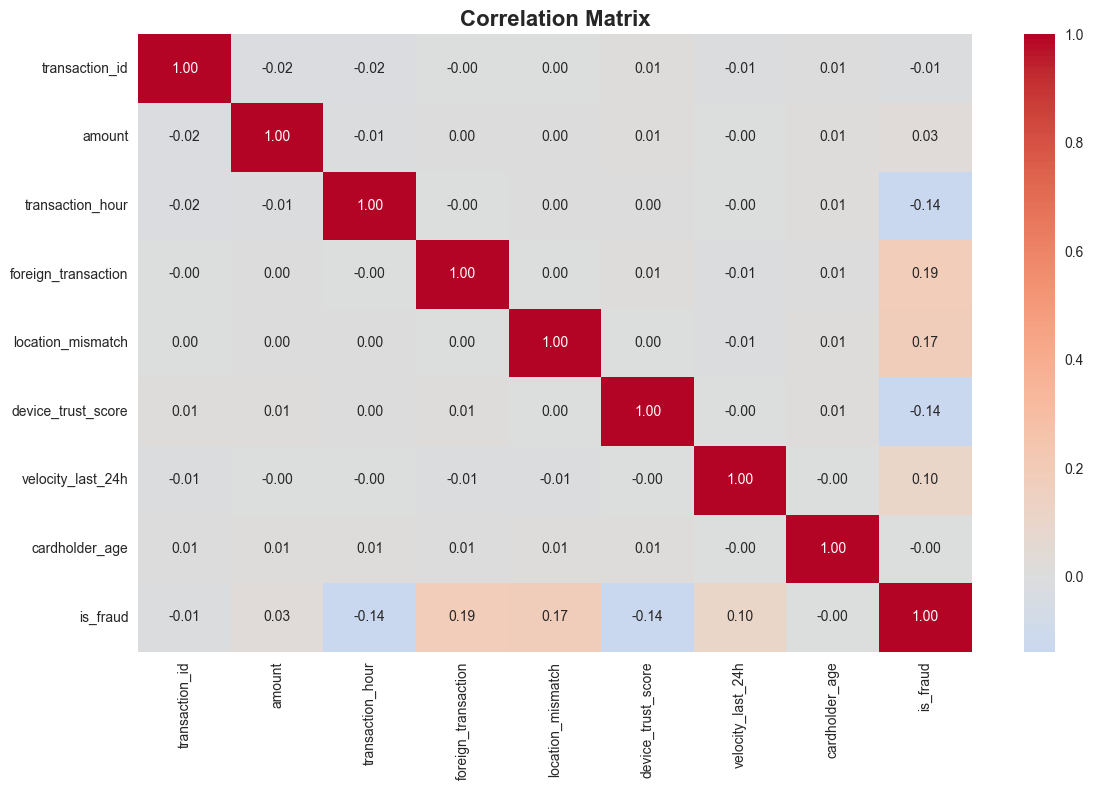


Fraud Rate by Merchant Category:
                   fraud_count  total_transactions  fraud_rate
merchant_category                                             
Grocery                     39                1944    0.020062
Food                        35                2093    0.016722
Travel                      29                1990    0.014573
Electronics                 24                1923    0.012480
Clothing                    24                2050    0.011707



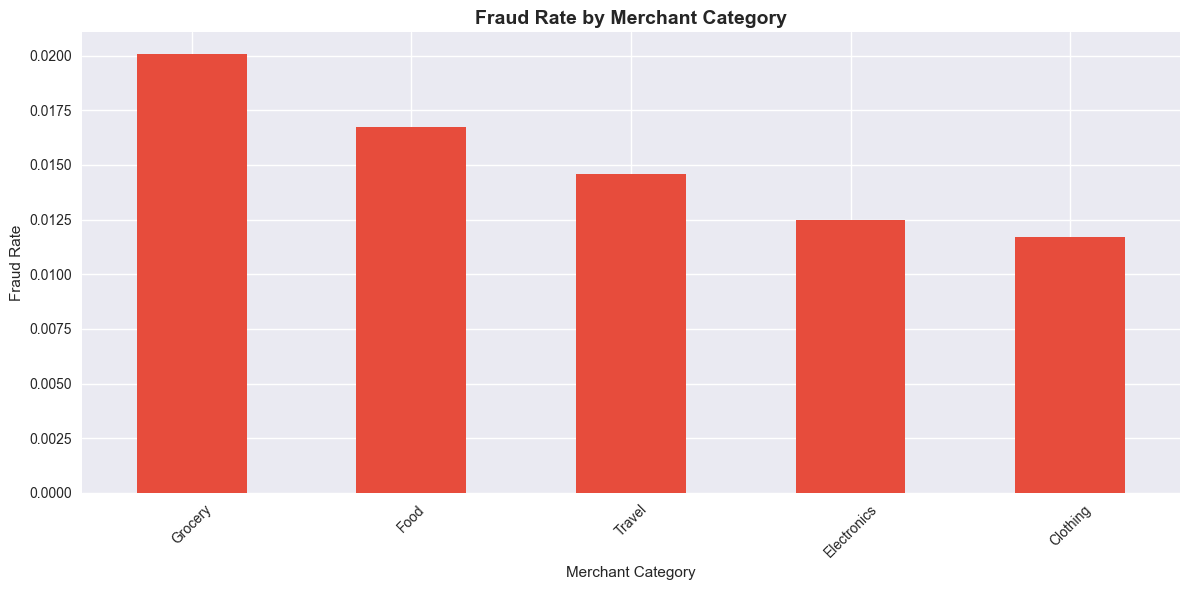

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*80)

# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")
print("\n" + "="*80)

# Check target distribution
print("Target Distribution:")
print(df['is_fraud'].value_counts())
print("\nTarget Distribution (%):")
print(df['is_fraud'].value_counts(normalize=True) * 100)
print("\n" + "="*80)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['is_fraud'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Fraud vs Non-Fraud Transactions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Is Fraud (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

# Pie chart
df['is_fraud'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                     colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Fraud Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Check merchant category distribution
print("\nMerchant Category Distribution:")
print(df['merchant_category'].value_counts())
print("\n" + "="*80)

# Analyze numerical features
numerical_cols = ['amount', 'transaction_hour', 'device_trust_score', 
                  'velocity_last_24h', 'cardholder_age']

print("\nNumerical Features Statistics by Fraud Status:")
print(df.groupby('is_fraud')[numerical_cols].mean())
print("\n" + "="*80)

# Visualize numerical features distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='is_fraud', ax=axes[idx])
    axes[idx].set_title(f'{col} by Fraud Status')
    axes[idx].set_xlabel('Is Fraud')
    axes[idx].set_ylabel(col)
    
plt.suptitle('Numerical Features Distribution by Fraud Status', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Fraud rate by merchant category
fraud_by_merchant = df.groupby('merchant_category')['is_fraud'].agg(['sum', 'count', 'mean'])
fraud_by_merchant.columns = ['fraud_count', 'total_transactions', 'fraud_rate']
fraud_by_merchant = fraud_by_merchant.sort_values('fraud_rate', ascending=False)
print("\nFraud Rate by Merchant Category:")
print(fraud_by_merchant)
print("\n" + "="*80)

# Visualize fraud rate by merchant category
plt.figure(figsize=(12, 6))
fraud_by_merchant['fraud_rate'].plot(kind='bar', color='#e74c3c')
plt.title('Fraud Rate by Merchant Category', fontsize=14, fontweight='bold')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Create a copy for preprocessing
df_processed = df.copy()

print("Step 1: Check Missing Values")
print(df_processed.isnull().sum())
print("\n" + "="*80)

# Step 2: Handle duplicates
print("\nStep 2: Remove Duplicates")
initial_shape = df_processed.shape[0]
df_processed = df_processed.drop_duplicates()
print(f"Removed {initial_shape - df_processed.shape[0]} duplicates")
print(f"New shape: {df_processed.shape}")
print("\n" + "="*80)

# Step 3: Feature Engineering - Create new features
print("\nStep 3: Feature Engineering")

# Transaction hour categories
df_processed['hour_category'] = pd.cut(df_processed['transaction_hour'], 
                                       bins=[0, 6, 12, 18, 24],
                                       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                       include_lowest=True)

# Amount categories
df_processed['amount_category'] = pd.cut(df_processed['amount'],
                                         bins=[0, 50, 150, 300, float('inf')],
                                         labels=['Low', 'Medium', 'High', 'Very High'])

# Age groups
df_processed['age_group'] = pd.cut(df_processed['cardholder_age'],
                                   bins=[0, 25, 35, 50, 100],
                                   labels=['Young', 'Adult', 'Middle Age', 'Senior'])

# Risk score calculation
df_processed['risk_score'] = (
    df_processed['foreign_transaction'] * 2 +
    df_processed['location_mismatch'] * 3 +
    (100 - df_processed['device_trust_score']) / 20 +
    df_processed['velocity_last_24h'] * 1.5
)

print("New features created:")
print("- hour_category")
print("- amount_category")
print("- age_group")
print("- risk_score")
print("\n" + "="*80)

# Step 4: Encode categorical variables
print("\nStep 4: Encode Categorical Variables")

# Label encoding for merchant_category
le_merchant = LabelEncoder()
df_processed['merchant_category_encoded'] = le_merchant.fit_transform(df_processed['merchant_category'])

# One-hot encoding for new categorical features
df_processed = pd.get_dummies(df_processed, columns=['hour_category', 'amount_category', 'age_group'], 
                              drop_first=True)

print("Encoded categorical features")
print(f"New shape: {df_processed.shape}")
print("\n" + "="*80)

# Step 5: Prepare features and target
print("\nStep 5: Prepare Features and Target")

# Drop unnecessary columns
columns_to_drop = ['transaction_id', 'merchant_category']
df_processed = df_processed.drop(columns=columns_to_drop)

# Separate features and target
X = df_processed.drop('is_fraud', axis=1)
y = df_processed['is_fraud']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFeatures columns:")
print(X.columns.tolist())
print("\n" + "="*80)

# Step 6: Split data
print("\nStep 6: Split Data into Train and Test Sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining set fraud distribution:")
print(y_train.value_counts())
print("\n" + "="*80)

# Step 7: Handle imbalanced data using SMOTE
print("\nStep 7: Handle Imbalanced Data with SMOTE")
print(f"Before SMOTE - Fraud cases: {y_train.sum()}, Non-fraud cases: {(y_train == 0).sum()}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Fraud cases: {y_train_balanced.sum()}, Non-fraud cases: {(y_train_balanced == 0).sum()}")
print(f"New training shape: {X_train_balanced.shape}")
print("\n" + "="*80)

# Step 8: Feature Scaling
print("\nStep 8: Feature Scaling (StandardScaler)")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")
print("\n" + "="*80)

# Convert back to DataFrame for better readability
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nPreprocessing Complete!")
print("="*80)
print("\nFinal Summary:")
print(f"Training samples: {X_train_final.shape[0]}")
print(f"Test samples: {X_test_final.shape[0]}")
print(f"Number of features: {X_train_final.shape[1]}")
print(f"Training set is balanced: {y_train_balanced.value_counts()[0] == y_train_balanced.value_counts()[1]}")

Step 1: Check Missing Values
transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64


Step 2: Remove Duplicates
Removed 0 duplicates
New shape: (10000, 10)


Step 3: Feature Engineering
New features created:
- hour_category
- amount_category
- age_group
- risk_score


Step 4: Encode Categorical Variables
Encoded categorical features
New shape: (10000, 21)


Step 5: Prepare Features and Target
Features shape: (10000, 18)
Target shape: (10000,)

Features columns:
['amount', 'transaction_hour', 'foreign_transaction', 'location_mismatch', 'device_trust_score', 'velocity_last_24h', 'cardholder_age', 'risk_score', 'merchant_category_encoded', 'hour_category_Morning', 'hour_category_Afternoon', 'hour_category_Evening', 'amount_category_Medium', 'amount_category_High', 'amount_category_Ver


Menyimpan data sebelum dan sesudah preprocessing untuk keperluan training dan evaluasi model di tahap selanjutnya.

In [5]:
import os

# Create directory if not exists
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

print("Saving data files...")
print("="*80)

# 1. Save original/raw data (before preprocessing)
print("\n1. Saving original data (before preprocessing)...")
df.to_csv('data/raw/credit_card_fraud_original.csv', index=False)
print("   ✓ Saved: data/raw/credit_card_fraud_original.csv")
print(f"   Shape: {df.shape}")

# 2. Save processed training data (after preprocessing, balanced, scaled)
print("\n2. Saving processed training data (balanced & scaled)...")
train_data = X_train_final.copy()
train_data['is_fraud'] = y_train_balanced.values
train_data.to_csv('data/processed/train_data.csv', index=False)
print("   ✓ Saved: data/processed/train_data.csv")
print(f"   Shape: {train_data.shape}")
print(f"   Fraud distribution: {y_train_balanced.value_counts().to_dict()}")

# 3. Save processed test data (after preprocessing, scaled)
print("\n3. Saving processed test data (scaled)...")
test_data = X_test_final.copy()
test_data['is_fraud'] = y_test.values
test_data.to_csv('data/processed/test_data.csv', index=False)
print("   ✓ Saved: data/processed/test_data.csv")
print(f"   Shape: {test_data.shape}")
print(f"   Fraud distribution: {y_test.value_counts().to_dict()}")

# 4. Save unscaled training data (for reference)
print("\n4. Saving unscaled training data (before SMOTE)...")
train_unscaled = X_train.copy()
train_unscaled['is_fraud'] = y_train.values
train_unscaled.to_csv('data/processed/train_data_unscaled.csv', index=False)
print("   ✓ Saved: data/processed/train_data_unscaled.csv")
print(f"   Shape: {train_unscaled.shape}")

# 5. Save unscaled test data (for reference)
print("\n5. Saving unscaled test data...")
test_unscaled = X_test.copy()
test_unscaled['is_fraud'] = y_test.values
test_unscaled.to_csv('data/processed/test_data_unscaled.csv', index=False)
print("   ✓ Saved: data/processed/test_data_unscaled.csv")
print(f"   Shape: {test_unscaled.shape}")

# 6. Save preprocessor objects (scaler and label encoder)
print("\n6. Saving preprocessor objects...")
import pickle

preprocessor_data = {
    'scaler': scaler,
    'le_merchant': le_merchant,
    'feature_columns': X.columns.tolist()
}

with open('data/processed/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor_data, f)
print("   ✓ Saved: data/processed/preprocessor.pkl")
print(f"   Contains: scaler, label_encoder, feature_columns ({len(X.columns)} features)")

print("\n" + "="*80)
print("All data files saved successfully!")
print("="*80)

# Summary of saved files
print("\n📁 Summary of Saved Files:")
print("\nRaw Data (Before Preprocessing):")
print("  └─ data/raw/credit_card_fraud_original.csv")
print("\nProcessed Data (After Preprocessing):")
print("  ├─ data/processed/train_data.csv (balanced & scaled)")
print("  ├─ data/processed/test_data.csv (scaled)")
print("  ├─ data/processed/train_data_unscaled.csv")
print("  ├─ data/processed/test_data_unscaled.csv")
print("  └─ data/processed/preprocessor.pkl")

print("\n✅ Data siap digunakan untuk training model!")

Saving data files...

1. Saving original data (before preprocessing)...
   ✓ Saved: data/raw/credit_card_fraud_original.csv
   Shape: (10000, 10)

2. Saving processed training data (balanced & scaled)...
   ✓ Saved: data/processed/train_data.csv
   Shape: (15758, 19)
   Fraud distribution: {0: 7879, 1: 7879}

3. Saving processed test data (scaled)...
   ✓ Saved: data/processed/test_data.csv
   Shape: (2000, 19)
   Fraud distribution: {0: 1970, 1: 30}

4. Saving unscaled training data (before SMOTE)...
   ✓ Saved: data/processed/train_data_unscaled.csv
   Shape: (8000, 19)

5. Saving unscaled test data...
   ✓ Saved: data/processed/test_data_unscaled.csv
   Shape: (2000, 19)

6. Saving preprocessor objects...
   ✓ Saved: data/processed/preprocessor.pkl
   Contains: scaler, label_encoder, feature_columns (18 features)

All data files saved successfully!

📁 Summary of Saved Files:

Raw Data (Before Preprocessing):
  └─ data/raw/credit_card_fraud_original.csv

Processed Data (After Preproc